## General GPyOPt new way of use

In [1]:
%pylab inline
import GPyOpt
import GPy
from numpy.random import seed
seed(1234)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Problem definition
func      = GPyOpt.objective_examples.experiments2d.sixhumpcamel()

domain =[{'name': 'var_1', 'type': 'continuous', 'domain':(-2,2) },
         {'name': 'var_2', 'type': 'continuous', 'domain':(-1,1) }]

constrains = [
    {'name': 'constr_1', 'constrain': '-x[:,1] -.5 + abs(x[:,0]) - np.sqrt(1-x[:,0]**2)'},
    {'name': 'constr_2', 'constrain': 'x[:,1] +.5 - abs(x[:,0]) - np.sqrt(1-x[:,0]**2)'}]

In [3]:
GPyOpt.methods.BayesianOptimization?

In [4]:
bo = GPyOpt.methods.BayesianOptimization(func.f, domain, model_type='GP_MCMC',evaluator_type='random',batch_size=4, acquisition_type ='EI_MCMC',exact_feval = True)

In [5]:
# --- Stop conditions
max_time  = None 
max_iter  = 5
tolerance = 1e-8     # distance between two consecutive observations  

# Run the optimization                                                  
bo.run_optimization(max_iter = max_iter, max_time = max_time, eps = tolerance) 

*Optimization completed:


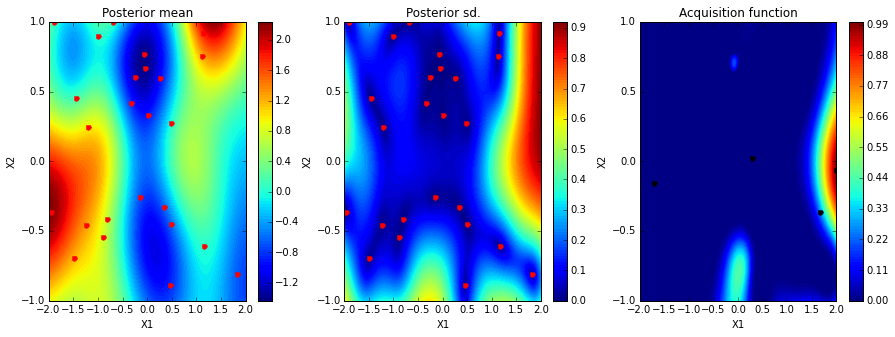

In [6]:
bo.plot_acquisition()

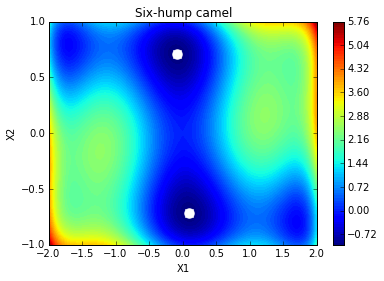

In [7]:
func.plot()

In [8]:
new_model = bo.model.copy()

In [9]:
bo.model.model

GP_regression.,value,constraints,priors
sum.rbf.variance,1.17955502046,+ve,
sum.rbf.lengthscale,0.519514623792,+ve,
sum.bias.variance,4.48274305982e-09,+ve,
Gaussian_noise.variance,1e-06,+ve fixed,


In [11]:
new_model.model

GP_regression.,value,constraints,priors
sum.rbf.variance,60.6371047972,+ve,
sum.rbf.lengthscale,2.1138502344,+ve,
sum.bias.variance,25.6845154542,+ve,
Gaussian_noise.variance,0.2,+ve fixed,


In [19]:
bo.acquisition.model.model.Gaussian_noise.fix(0.2)

array([0])

In [20]:
aq.model.model

GP_regression.,value,constraints,priors
sum.rbf.variance,60.6323318273,+ve,
sum.rbf.lengthscale,2.11382408681,+ve,
sum.bias.variance,25.6795770949,+ve,
Gaussian_noise.variance,0.2,+ve fixed,


In [30]:
bo.X[0,1]=333

In [28]:
Z = bo.X.copy()

In [34]:
from copy import deepcopy

In [35]:
new_aq = deepcopy(bo.acquisition)

In [40]:
bo.acquisition.space.space

[{'dimensionality': 1,
  'domain': (-2, 2),
  'name': 'var_1',
  'type': 'continuous'},
 {'dimensionality': 1,
  'domain': (-2, -1, -0.7, 0, 0.7, 1, 2),
  'name': 'var_2',
  'type': 'discrete'}]

In [39]:
new_aq.jitter

0.01